# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
# Your code here.
collected_data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

In [135]:
student_data = pd.DataFrame(collected_data)
student_data.head(10)

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


In [136]:
display(student_data)

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

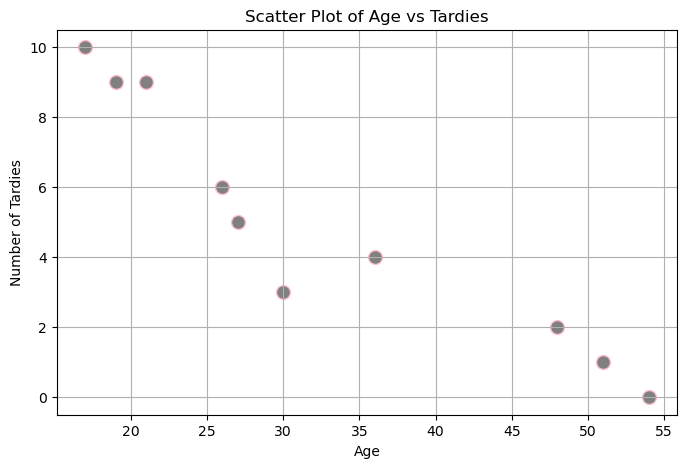

In [137]:
# Your code here.
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(student_data['Age'], student_data['Tardies'], color='grey', edgecolor='pink', s=100)
plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [138]:
# Your response here. 
"""

Yes, based on the scatter plot, there appears to be a trend. As age increases, the number of tardies tends to decrease, 
suggesting a potential negative correlation between age and tardiness.

Hypotheses

Inverse Relationship: Younger students (lower age) may be more likely to be tardy compared to older students.

Maturity Factor: Older students may demonstrate greater responsibility and punctuality.

External Factors: Younger students may face challenges such as transportation, time management, or morning routines affecting their punctuality.


"""



'\n\nYes, based on the scatter plot, there appears to be a trend. As age increases, the number of tardies tends to decrease, \nsuggesting a potential negative correlation between age and tardiness.\n\nHypotheses\n\nInverse Relationship: Younger students (lower age) may be more likely to be tardy compared to older students.\n\nMaturity Factor: Older students may demonstrate greater responsibility and punctuality.\n\nExternal Factors: Younger students may face challenges such as transportation, time management, or morning routines affecting their punctuality.\n\n\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [139]:
# Your response here.
#correlation:
covariance_matrix = student_data[['Age', 'Tardies']].cov()
covariance = covariance_matrix.loc['Age', 'Tardies']
print(f"Covariance: {covariance}")


#covariance:
correlation_matrix = student_data[['Age', 'Tardies']].corr()
correlation = correlation_matrix.loc['Age', 'Tardies']
print(f"Correlation: {correlation}")

"""
Covariance measures the degree to which two variables change together, but it is sensitive to the scale of the variables.
Correlation is a standardized measure, ranging from -1 to 1, providing a more interpretable indication of the strength and direction of the relationship.

In this specific case according to my findings, a negative correlation value suggests an inverse relationship between age and tardiness. 
A covariance value closer to 0 indicates a weaker linear dependence between the variables.
"""

Covariance: -45.56666666666667
Correlation: -0.9391626886887121


'\nCovariance measures the degree to which two variables change together, but it is sensitive to the scale of the variables.\nCorrelation is a standardized measure, ranging from -1 to 1, providing a more interpretable indication of the strength and direction of the relationship.\n\nIn this specific case according to my findings, a negative correlation value suggests an inverse relationship between age and tardiness. \nA covariance value closer to 0 indicates a weaker linear dependence between the variables.\n'

In [140]:
import statsmodels.api as sm

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [141]:
# Your response here.
X = sm.add_constant(student_data['Age'])
model = sm.OLS(student_data['Tardies'], X).fit()
print(model.summary())

"""
Comments:
The coefficient for 'Age' represents the estimated change in the outcome variable 'Tardies' for a one-unit change in 'Age'.
The intercept represents the estimated value of 'Tardies' when 'Age' is zero, which may not be meaningful in this context.
The R-squared value indicates the proportion of the variance in 'Tardies' explained by the model.

"""

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        01:36:12   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


"\nComments:\nThe coefficient for 'Age' represents the estimated change in the outcome variable 'Tardies' for a one-unit change in 'Age'.\nThe intercept represents the estimated value of 'Tardies' when 'Age' is zero, which may not be meaningful in this context.\nThe R-squared value indicates the proportion of the variance in 'Tardies' explained by the model.\n\n"

Plot your regression model on your scatter plot.

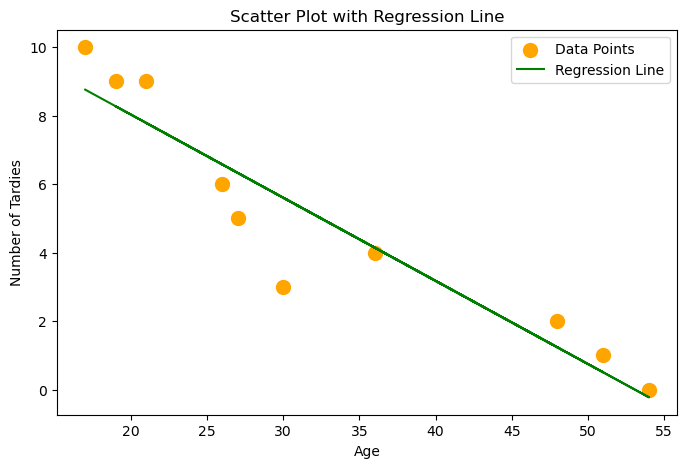

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        01:36:13   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [142]:
# Your code here.
plt.figure(figsize=(8, 5))
plt.scatter(student_data['Age'], student_data['Tardies'], color='orange', s=100, label='Data Points')

plt.plot(student_data['Age'], model.predict(X), color='green', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')

plt.legend()

plt.show()
print(model.summary())

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [143]:
# Your response here. 
"""

The linear regression model indicates that age is a statistically significant predictor of tardiness, 
explaining a substantial portion of the variance. However, whether age is considered a "good" predictor depends on the context 
and the level of predictive accuracy required. While the model is strong within the observed age range, caution is advised in making generalizations, 
and other factors influencing tardiness should be considered for a comprehensive understanding.


"""

'\n\nThe linear regression model indicates that age is a statistically significant predictor of tardiness, \nexplaining a substantial portion of the variance. However, whether age is considered a "good" predictor depends on the context \nand the level of predictive accuracy required. While the model is strong within the observed age range, caution is advised in making generalizations, \nand other factors influencing tardiness should be considered for a comprehensive understanding.\n\n\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [144]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [145]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [146]:
# Your response here. 

selected_columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = vehicles[selected_columns]

correlations = selected_data.corr()

display(correlations)

"""
A positive correlation indicates a positive linear relationship, while a negative correlation indicates a negative linear relationship.
The closer the correlation coefficient is to 1 or -1, the stronger the relationship.
Correlation does not imply causation.

"""


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


'\nA positive correlation indicates a positive linear relationship, while a negative correlation indicates a negative linear relationship.\nThe closer the correlation coefficient is to 1 or -1, the stronger the relationship.\nCorrelation does not imply causation.\n\n'

In [147]:
most_important_variable = correlations.iloc[-1, :-1].idxmax()
least_helpful_variable = correlations.iloc[-1, :-1].idxmin()

print(f"Most Important Variable: {most_important_variable}")
print(f"Least Helpful Variable: {least_helpful_variable}")

Most Important Variable: Fuel Barrels/Year
Least Helpful Variable: Combined MPG


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [148]:
# Your response here. 
X = sm.add_constant(selected_data.iloc[:, :-1])  # Exclude the outcome variable
model = sm.OLS(selected_data['CO2 Emission Grams/Mile'], X).fit()
print(model.summary())

"""


This is a multiple linear regression model as there are multiple predictor variables.
The model estimates coefficients for each predictor variable, indicating their impact on the outcome variable 'CO2 Emission Grams/Mile.'
The intercept term represents the estimated value of the outcome variable when all predictor variables are zero.
The summary provides information on coefficients, p-values, R-squared, and other statistics.


"""


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                             01:36:13   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

"\n\n\nThis is a multiple linear regression model as there are multiple predictor variables.\nThe model estimates coefficients for each predictor variable, indicating their impact on the outcome variable 'CO2 Emission Grams/Mile.'\nThe intercept term represents the estimated value of the outcome variable when all predictor variables are zero.\nThe summary provides information on coefficients, p-values, R-squared, and other statistics.\n\n\n"

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [149]:
# Your response here. 
print(model.summary())

"""
The model indicates that 'Fuel Barrels/Year' and 'Combined MPG' are statistically significant predictors of 'CO2 Emission Grams/Mile' based on their low p-values.
The negative coefficient for 'Combined MPG' suggests that as fuel efficiency (miles per gallon) increases, CO2 emissions tend to decrease.
The positive coefficient for 'Fuel Barrels/Year' implies that higher fuel consumption is associated with higher CO2 emissions.
Other variables may have varying impacts, and caution is advised in interpreting their coefficients.
The R-squared value (proportion of variance explained) provides a moderate level of confidence in the model's overall fit.
I know that correlation does not imply causation, and the model's predictions may have limitations outside the observed range.
Further analysis and validation are recommended, including checking for multicollinearity, examining residuals, and considering potential outliers.

"""

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                             01:36:13   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

"\nThe model indicates that 'Fuel Barrels/Year' and 'Combined MPG' are statistically significant predictors of 'CO2 Emission Grams/Mile' based on their low p-values.\nThe negative coefficient for 'Combined MPG' suggests that as fuel efficiency (miles per gallon) increases, CO2 emissions tend to decrease.\nThe positive coefficient for 'Fuel Barrels/Year' implies that higher fuel consumption is associated with higher CO2 emissions.\nOther variables may have varying impacts, and caution is advised in interpreting their coefficients.\nThe R-squared value (proportion of variance explained) provides a moderate level of confidence in the model's overall fit.\nI know that correlation does not imply causation, and the model's predictions may have limitations outside the observed range.\nFurther analysis and validation are recommended, including checking for multicollinearity, examining residuals, and considering potential outliers.\n\n"

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [150]:

#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [151]:
# Your code here.
#creating a dataframe
available_data = {'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]}
parties_data= pd.DataFrame(available_data)
parties_data.head(10)

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

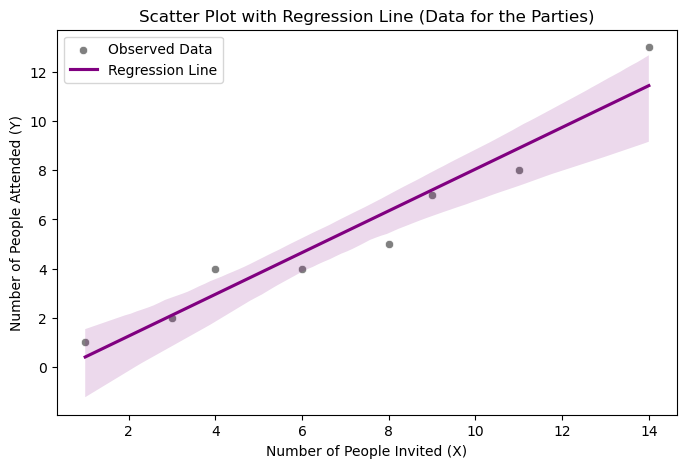

In [152]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='X', y='Y', data=parties_data, color='grey', label='Observed Data')

# Fit a simple linear regression line
sns.regplot(x='X', y='Y', data=parties_data, scatter=False, color='purple', label='Regression Line')

plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot with Regression Line (Data for the Parties)')
plt.legend()
plt.show()

In [153]:
"""

The scatter plot with the regression line provides a visual representation of the relationship between the number of people invited (X) 
and the number of people who attended (Y).


"""

'\n\nThe scatter plot with the regression line provides a visual representation of the relationship between the number of people invited (X) \nand the number of people who attended (Y).\n\n\n'

In [154]:
# Your response here. 
X = sm.add_constant(parties_data['X'])
model = sm.OLS(parties_data['Y'], X).fit()


In [155]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           0.000102
Time:                        01:36:13   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

/Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

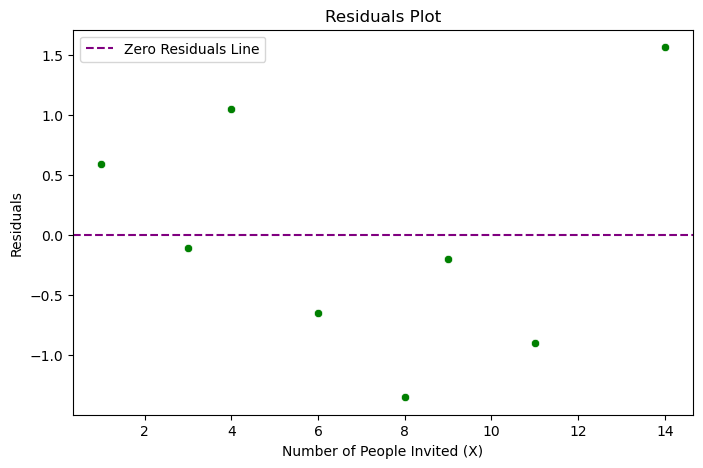

In [156]:
# Your response here. 
#Calculate residuals and plot residuals to visualise the differences between observed and predicted values.
#Points far from the zero residuals line might be considered outliers
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=parties_data['X'], y=residuals, color='green')
plt.axhline(y=0, color='purple', linestyle='--', label='Zero Residuals Line')
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

In [157]:
#Identify outliers based on residuals
outliers = (residuals.abs() > 2)  # Adjust the threshold as needed
parties_data_cleaned = parties_data[~outliers]


In [158]:
# Re-fit the regression model with cleaned data
X_cleaned = sm.add_constant(parties_data_cleaned['X'])
model_cleaned = sm.OLS(parties_data_cleaned['Y'], X_cleaned).fit()
print(model_cleaned.summary())

/Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           0.000102
Time:                        01:36:14   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

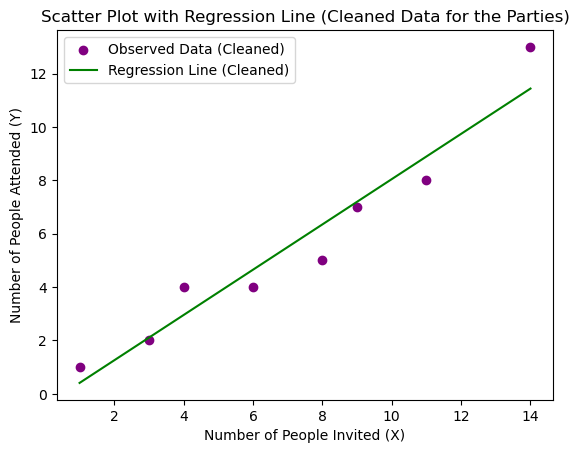

In [159]:
# Scatter plot with regression line for the cleaned data
plt.scatter(parties_data_cleaned['X'], parties_data_cleaned['Y'], color='purple', label='Observed Data (Cleaned)')
plt.plot(parties_data_cleaned['X'], model_cleaned.predict(X_cleaned), color='green', label='Regression Line (Cleaned)')
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot with Regression Line (Cleaned Data for the Parties)')
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [160]:
# Your response here. 
"""

 In the Initial Model (With Outliers): The presence of outliers might distort the overall pattern of the data, making the relationship less clear.
 while
 In the Final Model (Without Outliers): The final model, without the influence of outliers, 
 likely reflects a more accurate depiction of the underlying relationship between the number of people invited and the number of people attended.

What changed is that, The form of the data in the final model is expected to be closer to the central tendency of the majority of observations, as outliers are removed.
As well as the regression line in the final model is likely to provide a better fit to the main trend in the data.

The changes indicate that the form of the data without the problematic point (outlier) is more representative of the majority of observations, 
allowing for a more accurate interpretation of the relationship between the variables.

"""